In [144]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import fftpack
import processing_signals as ps

# plt.figure(figsize=(10, 7))

In [145]:
def signal_1d(a, w, ph, time_counts): # number of oscillations per second
    return a * np.sin(ph + 2 * np.pi * w * time_counts)

Входной и выходной 1d сигнал на адаптивный фильтр

In [146]:
right_bound = 10
number_of_point = 10000
# number_of_point = first_input_1d.size
t = np.linspace(0, right_bound, number_of_point, endpoint=False)

In [272]:
initial_weights_1d = np.array([1.5, 1.9, 2.3, 1.8, 1.2])

In [290]:
first_input_1d = signal_1d(0.1, 2, 0, t)
first_input_1d[500:] = 0
first_input_1d = np.roll(first_input_1d, 8000)

noise = ps.processing_of_signal(first_input_1d, initial_weights_1d)

useful_signal = signal_1d(2, 0.25, 0, t)
useful_signal[2000:] = 0
useful_signal = np.roll(useful_signal, 2000)

second_input_1d = useful_signal + noise
# second_input_1d = ps.processing_of_signal(first_input_1d, initial_weights_1d)

(10000,) (5,)


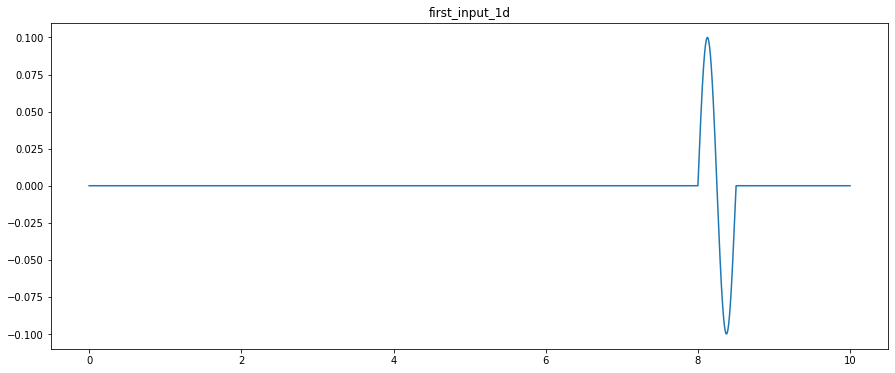

In [291]:
freq_bound = 10000

plt.figure(figsize=(15, 6))
# plt.subplot(1, 2, 1)
plt.plot(t[:freq_bound], first_input_1d[:freq_bound])
plt.title("first_input_1d")
plt.show()

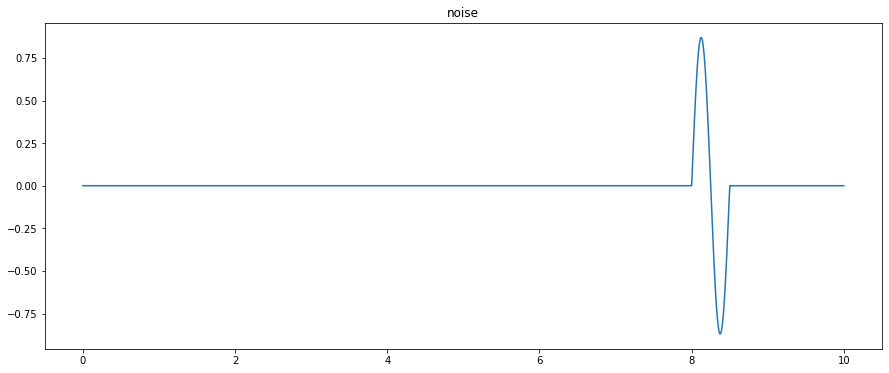

In [292]:
# freq_bound = 2100

plt.figure(figsize=(15, 6))
# plt.subplot(1, 2, 1)
plt.plot(t[:freq_bound], noise[:freq_bound])
plt.title("noise")

plt.show()

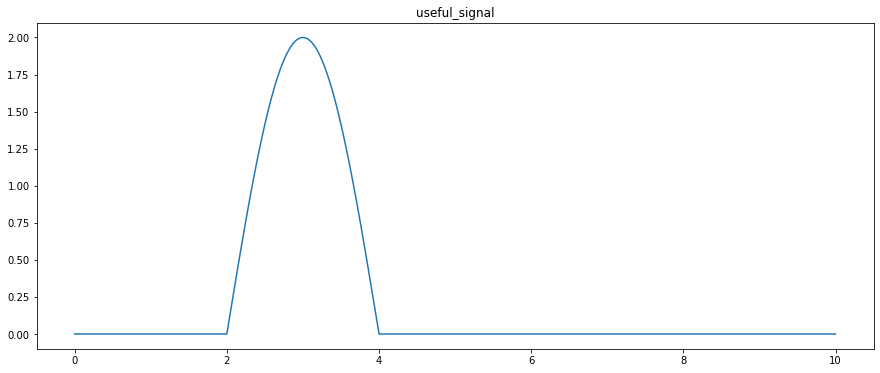

In [293]:
# freq_bound = 2100

plt.figure(figsize=(15, 6))
# plt.subplot(1, 2, 1)
plt.plot(t[:freq_bound], useful_signal[:freq_bound])
plt.title("useful_signal")

plt.show()

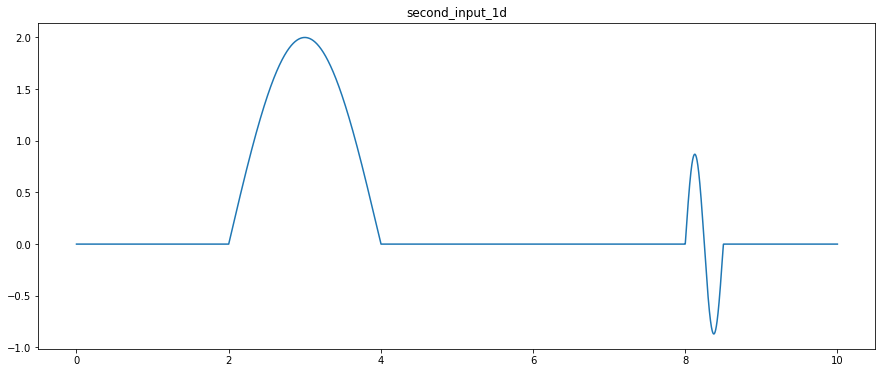

In [294]:
plt.figure(figsize=(15, 6))
# plt.subplot(1, 2, 1)
plt.plot(t, second_input_1d)
plt.title("second_input_1d")
plt.show()

Определим длину вектора высовых коэффициентов свертки, которыми мы будем апроксимировать АЧХ исходной системы

In [308]:
number_of_weights = 3

Выведим полученные коэффициенты свертки

In [309]:
approx_weights_LMS_1d = ps.fitting_of_LMS(first_input_1d, second_input_1d, number_of_weights, 0.5, 1)
approx_weights_NLMS_1d = ps.fitting_of_NLMS(first_input_1d, second_input_1d, number_of_weights, 0.9, 1)
approx_weights_RLS_1d = ps.fitting_of_RLS(first_input_1d, second_input_1d, number_of_weights, 0.9999, 1)
print("approx_weights_LMS_1d", approx_weights_LMS_1d)
print("approx_weights_NLMS_1d", approx_weights_NLMS_1d)
print("approx_weights_RLS_1d", approx_weights_RLS_1d)

approx_weights_LMS_1d [2.83615815 2.86767406 2.89875128]
approx_weights_NLMS_1d [2.80728116 2.85457959 2.9014528 ]
approx_weights_RLS_1d [2.73096516 2.73944627 2.74751673]


Построим сигналы по найденным весам

In [310]:
approx_signal_LMS_1d = ps.processing_of_signal(first_input_1d, approx_weights_LMS_1d)
approx_signal_NLMS_1d = ps.processing_of_signal(first_input_1d, approx_weights_NLMS_1d)
approx_signal_RLS_1d = ps.processing_of_signal(first_input_1d, approx_weights_RLS_1d)

(10000,) (3,)
(10000,) (3,)
(10000,) (3,)


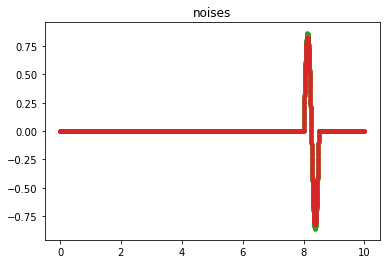

In [311]:
# plt.figure(figsize=(15, 6))
plt.plot(t, noise, label="initial")
plt.plot(t, approx_signal_LMS_1d, ".", label="LMS")
plt.plot(t, approx_signal_NLMS_1d, ".", label="NLMS")
plt.plot(t, approx_signal_RLS_1d, ".", label="RLS")
plt.title("noises")
plt.show()

In [312]:
print("MSE", ps.MSE(noise, first_input_1d))
print("MSE LMS", ps.MSE(noise, approx_signal_LMS_1d))
print("MSE NLMS", ps.MSE(noise, approx_signal_NLMS_1d))
print("MSE RLS", ps.MSE(noise, approx_signal_RLS_1d))

MSE 0.014818127
MSE LMS 2.3638847e-06
MSE NLMS 4.650439e-06
MSE RLS 5.794953e-05


# Рассмотрим АЧХ исходной и полученной передаточной функции

In [313]:
# all_spectrum = np.zeros(t.size)
# all_spectrum[int(t.size / 2)] = 1

all_spectrum = np.zeros(100)
all_spectrum[50] = 1

In [314]:
initial_weights_signal_1d = ps.processing_of_signal(all_spectrum, initial_weights_1d)

(100,) (5,)


In [315]:
# plt.plot(np.arange(100), initial_weights_signal_1d, ".")
# plt.title("initial_weights_signal_1d")
# plt.show()

freq_bound = 1500

initial_fx = fftpack.fftfreq(initial_weights_signal_1d.size, right_bound / number_of_point)
initial_fy = np.abs(fftpack.fft(initial_weights_signal_1d))

# plt.plot(initial_fx[:freq_bound], initial_fy[:freq_bound], ".")
# plt.title("afh_initial_weights_signal_1d")
# plt.show()

In [316]:
approx_signal_LMS_AFH_1d = ps.processing_of_signal(all_spectrum, approx_weights_LMS_1d)
approx_signal_NLMS_AFH_1d = ps.processing_of_signal(all_spectrum, approx_weights_NLMS_1d)
approx_signal_RLS_AFH_1d = ps.processing_of_signal(all_spectrum, approx_weights_RLS_1d)

(100,) (3,)
(100,) (3,)
(100,) (3,)


In [317]:
# plt.plot(np.arange(100), approx_weights_signal_1d, ".")
# plt.title("approx_weights_signal_1d")
# plt.show()

freq_bound = 1500

approx_xfft_signal_LMS_1d = fftpack.fftfreq(approx_signal_LMS_AFH_1d.size, right_bound / number_of_point)
approx_yfft_signal_LMS_1d = np.abs(fftpack.fft(approx_signal_LMS_AFH_1d))

approx_xfft_signal_NLMS_1d = fftpack.fftfreq(approx_signal_NLMS_AFH_1d.size, right_bound / number_of_point)
approx_yfft_signal_NLMS_1d = np.abs(fftpack.fft(approx_signal_NLMS_AFH_1d))

approx_xfft_signal_RLS_1d = fftpack.fftfreq(approx_signal_RLS_AFH_1d.size, right_bound / number_of_point)
approx_yfft_signal_RLS_1d = np.abs(fftpack.fft(approx_signal_RLS_AFH_1d))

# plt.plot(approx_fft_signal_LMS_1d[:freq_bound], approx_fft_signal_LMS_1d[:freq_bound], ".")
# plt.title("afh_approx_weights_signal_1d")
# plt.show()

Наложим их АЧХ друг на друга

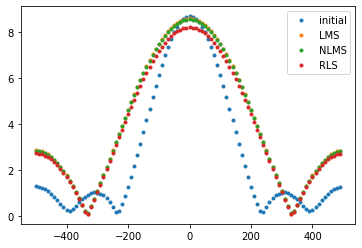

In [318]:
plt.plot(initial_fx, initial_fy, ".", label='initial')
plt.plot(approx_xfft_signal_LMS_1d, approx_yfft_signal_LMS_1d, ".", label='LMS')
plt.plot(approx_xfft_signal_NLMS_1d, approx_yfft_signal_NLMS_1d, ".", label='NLMS')
plt.plot(approx_xfft_signal_RLS_1d, approx_yfft_signal_RLS_1d, ".", label='RLS')
# plt.title(f"double AFH, MSE = {ps.MSE(approx_fy, initial_fy)}")
plt.legend()
plt.show()

In [319]:
print("MSE LMS", ps.MSE(initial_fy, approx_yfft_signal_LMS_1d))
print("MSE NLMS", ps.MSE(initial_fy, approx_yfft_signal_NLMS_1d))
print("MSE RLS", ps.MSE(initial_fy, approx_yfft_signal_RLS_1d))

MSE LMS 3.2644634
MSE NLMS 3.2100477
MSE RLS 2.7724476
